# Predicting the Medical Cost of Individuals based on Their Personal Data

The dataset involves predicting the medical cost of individuals based on their personal data.

Here we are going to use Linear Regression for building the model.

So the notebook contains data visualization, relevant libraries and the implemented code for the model.<br>

We're going to take the following approach:<br>

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Preprocessing
6. Modelling
7. Postprocessing
8. Evaluating the model

## 1. Problem Definition
- Task T: Predicting the medical cost of the individual
- Performance Measure P: Comparing the error between true and predicted values
- Training experience E: Using a set of data with given medical cost

## 2. Data
The dataset selected for the modelling is available on Kaggle.<br>
https://www.kaggle.com/datasets/mirichoi0218/insurance/data

## 3. Evaluation
When predicting medical costs using the Medical Cost Personal Datasets, it is essential to use performance metrics that provide a comprehensive evaluation of the regression model's accuracy and effectiveness. Here are some of the best performance metrics for this dataset:

1. Mean Absolute Error (MAE)
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is useful for understanding the average error in dollar terms, which is intuitive and easy to interpret.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$


2. Mean Squared Error (MSE)
MSE measures the average of the squares of the errors. It emphasizes larger errors due to the squaring term, making it useful for highlighting models that perform poorly on outliers.
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In additionally to that, we are using Root Mean Squared Erro and consider it as the main performance metric in this model.

RMSE (Root Mean Squared Error) is an important metric for evaluating regression models, including linear regression models like Ridge, Lasso, and Elastic Net. Here's why RMSE is particularly useful in comparing the performance of these models:

1. **Interpretability**: RMSE provides an intuitive measure of how well the model's predictions align with the actual target values. It represents the average magnitude of the errors between predicted and actual values, expressed in the same units as the target variable. This makes it easy to interpret and communicate the model's performance to stakeholders.

2. **Sensitivity to Errors**: RMSE penalizes large prediction errors more heavily than smaller errors due to the squaring operation. This property makes RMSE particularly sensitive to outliers or large errors, which is important for identifying cases where the model performs poorly.

3. **Direct Comparison**: RMSE allows for direct comparison of models' predictive accuracy. Lower RMSE values indicate better model performance, while higher RMSE values suggest poorer performance. Therefore, when comparing different regression models, the one with the lower RMSE is generally preferred as it makes more accurate predictions.

4. **Use in Cross-Validation**: RMSE is often used as the evaluation metric in cross-validation procedures, including in `GridSearchCV`. By optimizing models based on RMSE during hyperparameter tuning, we aim to select the model configuration that minimizes prediction errors across different folds of the data, leading to better generalization performance.

5. **Relative Performance**: In the context of comparing Ridge, Lasso, and Elastic Net regression models, RMSE serves as a reliable metric for assessing their relative performance. Since these models have different regularization mechanisms (L1, L2, or a combination), comparing their RMSE values allows us to understand how well they generalize to new data and whether one regularization approach outperforms the others for the specific dataset.


## 4. Features
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

## 4.1 Import Libraries

In [38]:
# Import Data Handling Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Cross Validation Libraries from Scikit Learn
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, ElasticNet

# Import Scaling Libraries and Scaling Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Sampling Model for Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import Evalution Metrices from Scikit Learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Import for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 4.2 Load Data

In [40]:
# Loading the data from .csv file and save in pada dataframe
df = pd. read_csv('/content/drive/MyDrive/ML/insurance.csv')
# Displaying the data converted in to dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
# Identifying the shape of the dataframe
df.shape

(1338, 7)

## 5. Preprocessing
### 5.1 Overall Data Analysis and Visualization

In [42]:
# Visualizing the first 5 records of the data set
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
# Visualizing the last 5 records of the data set
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [44]:
# Feature Information - Specially the name and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
# Numerical Descriptions about Features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [46]:
# Identifying the total number of missing values in features
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in the dataset.

### 5.3 Feature Analysis and Visualization
It is better to have an undersanding about the behavior of the data within the dataset before modelling.
#### 5.3.1 Stroke Frequency according to Sex, Smoking Status and Region

In [47]:
# Identifying the number of gender types in the data set.
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [48]:
# Identifying the number for Smoking status in the data set
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [49]:
# Identifying the number for region in the data set
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

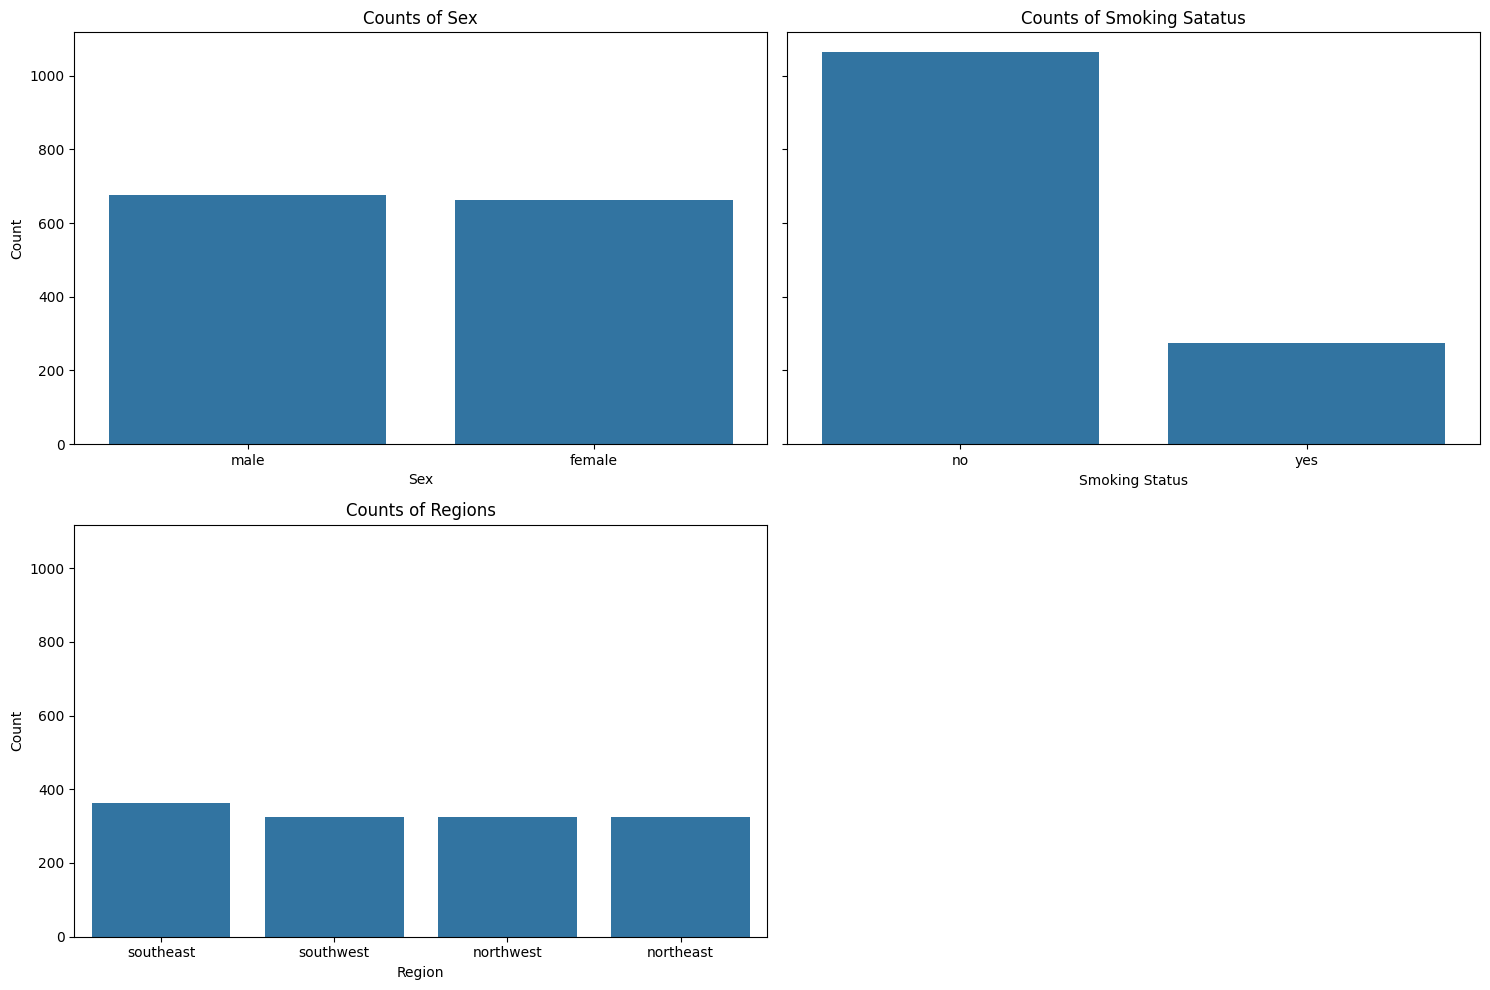

In [50]:
# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

region_counts = df['sex'].value_counts().reset_index()
region_counts.columns = ['sex', 'count']

# Plot the counts using seaborn
sns.barplot(x='sex', y='count', data=region_counts, ax=axs[0,0])
axs[0,0].set_title('Counts of Sex')
axs[0,0].set_xlabel('Sex')
axs[0,0].set_ylabel('Count')

region_counts = df['smoker'].value_counts().reset_index()
region_counts.columns = ['smoker', 'count']

# Plot the counts using seaborn
sns.barplot(x='smoker', y='count', data=region_counts, ax=axs[0,1])
axs[0,1].set_title('Counts of Smoking Satatus')
axs[0,1].set_xlabel('Smoking Status')
axs[0,1].set_ylabel('Count')

region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Plot the counts using seaborn
sns.barplot(x='region', y='count', data=region_counts, ax=axs[1,0])
axs[1,0].set_title('Counts of Regions')
axs[1,0].set_xlabel('Region')
axs[1,0].set_ylabel('Count')

# Remove the last subplot
fig.delaxes(axs[1, 1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [51]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### 5.4 Converting Categorical Values into Numerical Values

In [52]:
# Recalling the information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As in above thare are some featues having the data type as object. They are;

1. sex
2. smoker
3. region<br>

We have to convert them in to string type first.

In [53]:
# Creating new dataframe for the features includes the data type 'object'

# Creating a list which have the data type 'object'
cat_columns= df.select_dtypes(include=['object'] )
# Creating a dataframe using it
new_categories = pd.DataFrame(cat_columns)
# Displaying first few rows in dataframe
new_categories.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [54]:
# Creating a dataframe for the above using One hot encoding for categories. Here result had been converted into integer as if we give float
# model has to compute by thinking more.
dummy_category = dummy_df = pd.get_dummies(new_categories).apply(lambda x: x.astype(bool).astype(int))
# # Displaying first few rows in dataframe
dummy_category.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [55]:
# Information of the created all categories
dummy_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sex_female        1338 non-null   int64
 1   sex_male          1338 non-null   int64
 2   smoker_no         1338 non-null   int64
 3   smoker_yes        1338 non-null   int64
 4   region_northeast  1338 non-null   int64
 5   region_northwest  1338 non-null   int64
 6   region_southeast  1338 non-null   int64
 7   region_southwest  1338 non-null   int64
dtypes: int64(8)
memory usage: 83.8 KB


In [56]:
# There are some features when considering together repeats the same idea. Ex: gender_Male, gender_Female
#  Here they are removed so that the repeating the same data is avoided and reducing the number of cateogories make it easy for the models.

# Creating the list of repeating same idea
categories_to_be_removed = ['sex_female','smoker_no','region_southwest']

# Removing data
dummy_category_formatted = dummy_category.drop(categories_to_be_removed, axis=1)

# First few information of them
dummy_category_formatted.head()

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,0,1,0,0,0
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,1,0
4,1,0,0,1,0


In [57]:
# It is easy to work with features if they are named properly. In below the list contains the collection of featues which are going to be reanamed with
# new names
renamed_categories = {
    'sex_male': 'is_sex_male',
    'smoker_yes': 'is_a_smoker_yes',
    'region_northeast': 'is_region_northeast',
    'region_northwest': 'is_region_northwest',
    'region_southeast': 'is_region_southeast'
}

# Giving rename operation using the above list
dummy_category_formatted_renamed=dummy_category_formatted.rename(columns=renamed_categories)

# First few information of the dataframe with rename columns
dummy_category_formatted_renamed.head()

,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
0,0,1,0,0,0
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,1,0
4,1,0,0,1,0


In [58]:
# Now we have to combine the above dataframe to the dataframe that we are using. Following code shows how to do it.
df_final_before= pd.concat([df,dummy_category_formatted_renamed],axis=1)

# The dataframe after combining the columns
df_final_before.head()

,age,sex,bmi,children,smoker,region,charges,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0


In [59]:
# Now we have to removed the columns with previous categorical data as now we have encoded collection of features for them.

# Creating a list containing the categories to be removed
categories_to_be_dropped = ['sex', 'smoker', 'region']

# Removing them from the dataframe
df_final = df_final_before.drop(categories_to_be_dropped, axis=1)
df_final.head()

,age,bmi,children,charges,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


It is good to identify the relationships between each of the two features in the dataframe before modeling.

In [60]:
# Finding the correlation between features
df_final.corr()

,age,bmi,children,charges,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982
is_sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117
is_a_smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498
is_region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561
is_region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265
is_region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000


Instead of having the values in a table it is pleasant to observe and visualize the above data in a matrix.

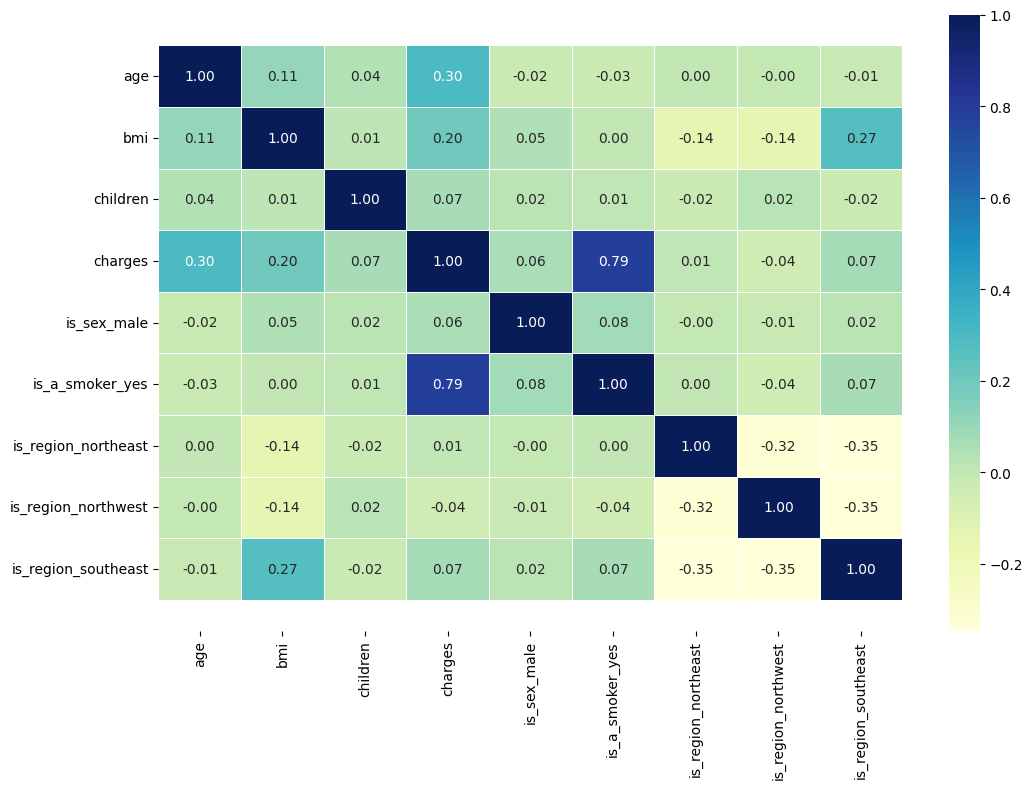

In [61]:
# Let's make our correlation matrix a little prettier
corr_matrix=df_final.corr()
fig, ax =plt.subplots(figsize=(12,8))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

bottom ,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

## 6. Modelling
Now we have to use the algorithms for our data set. Before that we should seperate the dataframe into features and target values.

In our data set 'charges' column is as the target value and other columns are features.

In [62]:
# Split dat into X and y

# X is created by removing the 'stroke' feature from the dataframe
X=df_final.drop("charges", axis=1)

# y is created by taking the 'stroke' feature from the dataframe
y=df_final["charges"]

In [63]:
# Split data into train and test set

# The above we saw that our data frame first contain positive stroke data set and the negative stroke data. If we use it directly model is wrongly
# trained as the data set is not randomized.

# Randomize the data set
np.random.seed(42)

#Split the data set into train and test data set considering the test data set size as 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
# Train feature values set
X_train

,age,bmi,children,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
560,46,19.950,2,0,0,0,1,0
1285,47,24.320,0,0,0,1,0,0
1142,52,24.860,0,0,0,0,0,1
969,39,34.320,5,0,0,0,0,1
486,54,21.470,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0,0,1,0,0
1130,39,23.870,5,0,0,0,0,1
1294,58,25.175,0,1,0,1,0,0
860,37,47.600,2,0,1,0,0,0


In [65]:
# Train label value set
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [66]:
# Test feature value set
X_test

,age,bmi,children,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
764,45,25.175,2,0,0,1,0,0
887,36,30.020,0,0,0,0,1,0
890,64,26.885,0,0,1,0,1,0
1293,46,25.745,3,1,0,0,1,0
259,19,31.920,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
109,63,35.090,0,1,1,0,0,1
575,58,27.170,0,0,0,0,1,0
535,38,28.025,1,1,0,1,0,0
543,54,47.410,0,0,1,0,0,1


In [67]:
# Test label value set
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [68]:
# Information of the data set to be modelled
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   bmi                  1338 non-null   float64
 2   children             1338 non-null   int64  
 3   charges              1338 non-null   float64
 4   is_sex_male          1338 non-null   int64  
 5   is_a_smoker_yes      1338 non-null   int64  
 6   is_region_northeast  1338 non-null   int64  
 7   is_region_northwest  1338 non-null   int64  
 8   is_region_southeast  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


According to the above data, age, bmi, children should be standardized before modelling.

In [69]:
# The categories that should be scaled
cateogires_to_be_scaled = ['age','bmi', 'children']

# Calling the Standard scalar and saving it in a variable to use
scalar = StandardScaler()

# Scaling the train features and test features
X_train[cateogires_to_be_scaled] = scalar.fit_transform(X_train[cateogires_to_be_scaled])
X_test[cateogires_to_be_scaled] = scalar.transform(X_test[cateogires_to_be_scaled])

In [70]:
# First few columns in training features set
X_train.head()

,age,bmi,children,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
560,0.472227,-1.756525,0.734336,0,0,0,1,0
1285,0.543313,-1.033082,-0.911192,0,0,1,0,0
1142,0.898745,-0.943687,-0.911192,0,0,0,0,1
969,-0.025379,0.622393,3.202629,0,0,0,0,1
486,1.040918,-1.504893,1.557100,0,0,0,1,0


In [71]:
# First few columns in training label data
X_test.head()

,age,bmi,children,is_sex_male,is_a_smoker_yes,is_region_northeast,is_region_northwest,is_region_southeast
764,0.401140,-0.891539,0.734336,0,0,1,0,0
887,-0.238638,-0.089461,-0.911192,0,0,0,1,0
890,1.751782,-0.608453,-0.911192,0,1,0,1,0
1293,0.472227,-0.797177,1.557100,1,0,0,1,0
259,-1.447107,0.225079,-0.911192,1,1,0,1,0


In [72]:
# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test datA
y_pred_without_tuning = model.predict(X_test)

# Evaluate the model
mae_before_tuning = mean_absolute_error(y_test, y_pred_without_tuning)
mse_before_tuning = mean_squared_error(y_test, y_pred_without_tuning)
rmse_before_tuning = np.sqrt(mse_before_tuning)

# Print the scores
print(f'Performance before Tuning\n')
print(f'Mean Absolute Error       : {mae_before_tuning}')
print(f'Mean Squared Error        : {mse_before_tuning}')
print(f'Root Mean Squared Error   : {rmse_before_tuning}')


Performance before Tuning

Mean Absolute Error       : 4181.1944737536505
Mean Squared Error        : 33596915.851361476
Root Mean Squared Error   : 5796.284659276274
r2 Score                  : 0.7835929767120722


## 7. Hyperparameter Tuning
Now we have to select the best parameters for Below shows the hyperparameter tuning for Linear Regression.<br>
As linear regreesion has no parameters for tuninng we use ElasticNet.

In [82]:
# Define the model
model_tuned = ElasticNet()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 200],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

# Using K-flod cross validation
# Number of folds
k_folds = 20
# Creating and saving kfold model
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create Grid Search CV
grid_search = GridSearchCV(model_tuned, param_grid, scoring='neg_mean_squared_error', cv=kf, refit='rmse')

# Fit the model
grid_search.fit(X_train, y_train)

# Finding the best parameter values
best_parameters = grid_search.best_params_
# Predicting test data set using the best parameter model
y_pred_after_tuning = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mae_after_tuning = mean_absolute_error(y_test, y_pred_after_tuning)
mse_after_tuning = mean_squared_error(y_test, y_pred_after_tuning)
rmse_after_tuning = np.sqrt(mse_after_tuning)
r2_after_tuning = r2_score(y_test, y_pred_after_tuning)

# Print the scores
print(f'Performance after Tuning\n')
print(f'Mean Absolute Error       : {mae_after_tuning}')
print(f'Mean Squared Error        : {mse_after_tuning}')
print(f'Root Mean Squared Error   : {rmse_after_tuning}')
print(f'r2 Score                  : {r2_after_tuning}')



Performance after Tuning

Mean Absolute Error       : 4246.628847310126
Mean Squared Error        : 34250141.893714115
Root Mean Squared Error   : 5852.36207814538
r2 Score                  : 0.779385367180736


## 8. Evaluating the model
The model we built with Logistic Regression has a good performance.